<h2>부동산 수요 측정, 분석하기

매매가 상승율 vs. 전세가 상승율 비교를 통해 부동산 수요 측정을 한다.

부동산 실수요를 나타내는 지수가 전세가 지수이다. 
<br>


----

데이터는 KB부동산에서 받은 엑셀 데이터 (월간시계열 엑셀 파일)이며, "쉬트: 매매APT, 전세APT" 이다

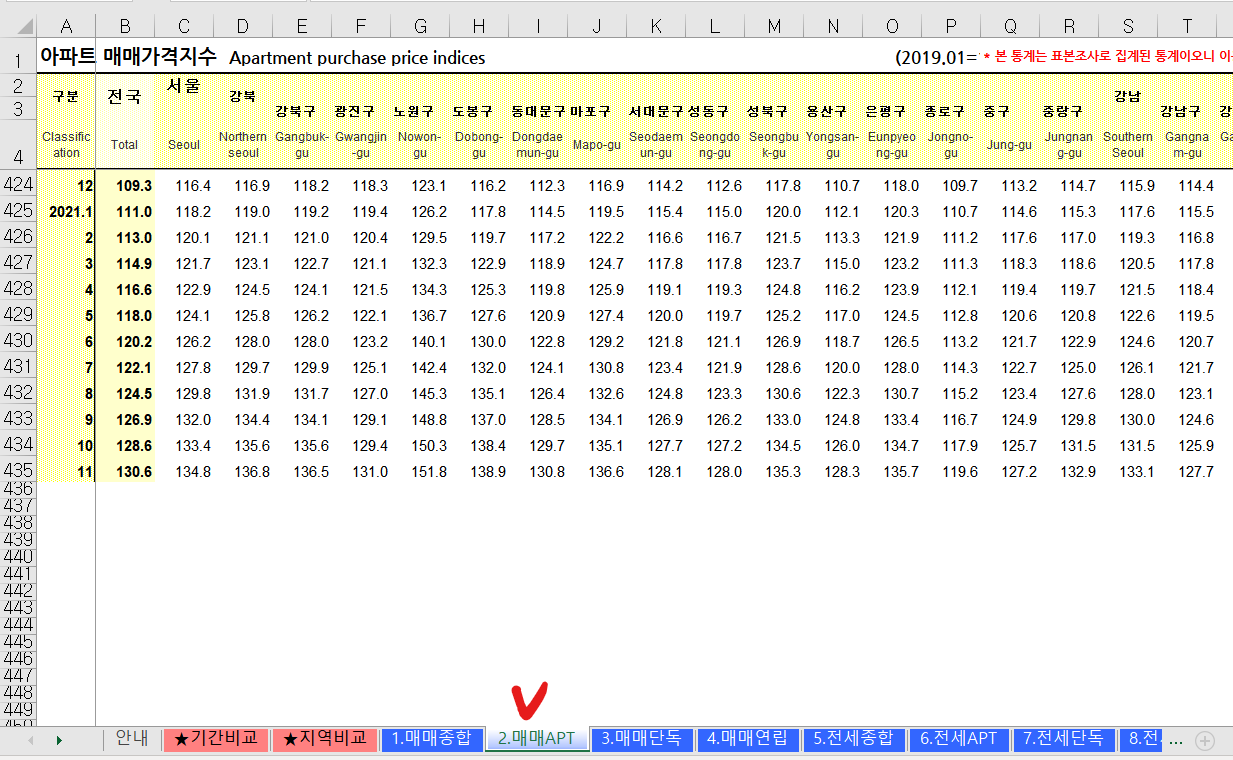

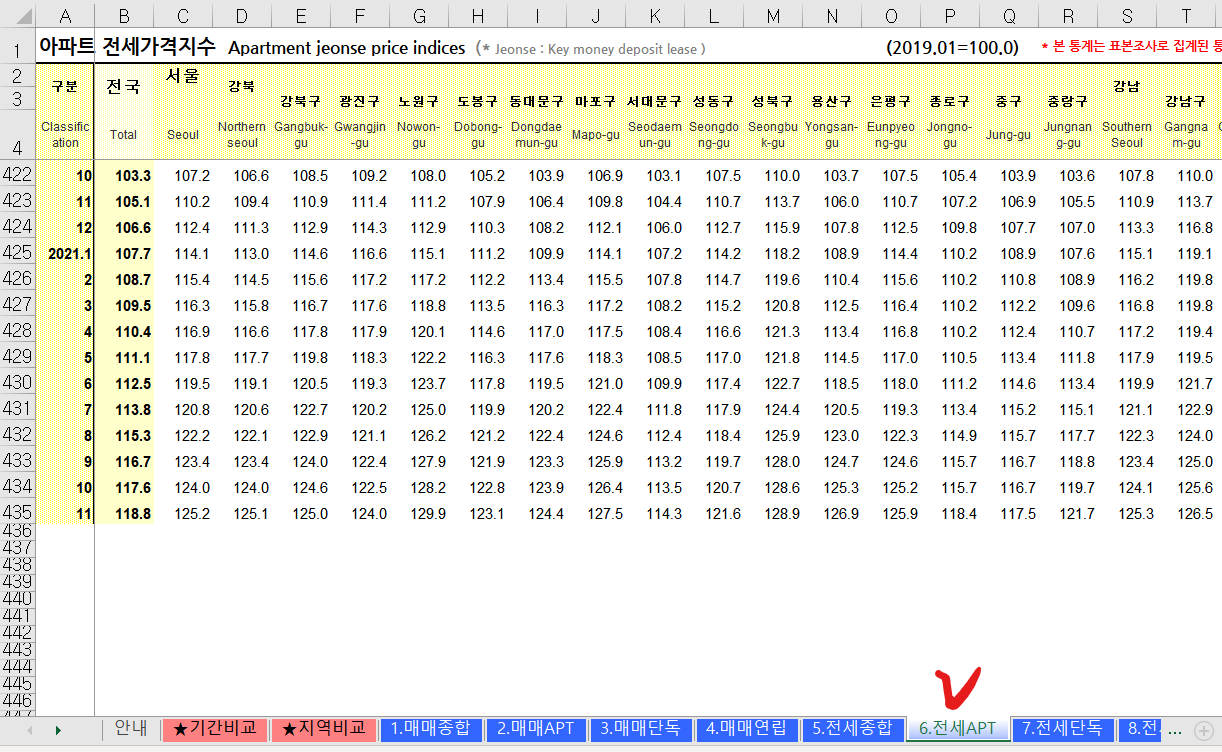

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlwings as xw

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

%matplotlib inline
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus']=False

#pd.describe_option() 
pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 30)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
path=r'./data/부동산가격지수.xlsx'
price_index=pd.read_excel(path, sheet_name='2.매매APT', index_col=0)
jeonse_index=pd.read_excel(path, sheet_name='6.전세APT', index_col=0)

In [4]:
price_index.head()
jeonse_index.head()


,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,* 본 통계는 표본조사로 집계된 통계이오니 이용에 참고하시기 바랍니다.,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186
아파트 매매가격지수 Apartment purchase price indices (2019.01=100.0),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
구분,전국,서울,강북,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6개광역시,부산,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,인천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,광주,NaN,NaN,NaN,NaN,NaN,대전,NaN,NaN,NaN,NaN,NaN,울산,NaN,NaN,NaN,NaN,NaN,5개광역시,수도권,세종,경기,수원,NaN,NaN,NaN,NaN,성남,NaN,NaN,NaN,고양,NaN,NaN,NaN,안양,NaN,NaN,부천,의정부,광명,평택,안산,NaN,NaN,과천,구리,남양주,용인,NaN,NaN,NaN,시흥,군포,의왕,하남,오산,파주,이천,안성,김포,양주,동두천,광주,화성,강원,춘천,강릉,원주,충북,청주,NaN,NaN,NaN,NaN,충주,제천,충남,천안,NaN,NaN,공주,아산,논산,계룡,당진,서산,전북,전주,NaN,NaN,익산,군산,전남,목포,순천,광양,여수,경북,포항,NaN,NaN,구미,경산,안동,김천,경남,창원,NaN,NaN,NaN,NaN,NaN,양산,거제,진주,김해,통영,제주도,제주/\n서귀포,기타지방
NaN,NaN,NaN,NaN,강북구,광진구,노원구,도봉구,동대문구,마포구,서대문구,성동구,성북구,용산구,은평구,종로구,중구,중랑구,NaN,강남구,강동구,강서구,관악구,구로구,금천구,동작구,서초구,송파구,양천구,영등포구,NaN,NaN,중구,서구,동구,영도구,부산진구,동래구,남구,북구,해운대구,사하구,금정구,연제구,수영구,사상구,기장군,강서구,NaN,중구,동구,서구,남구,북구,수성구,달서구,달성군,NaN,중구,동구,미추홀구,연수구,남동구,부평구,계양구,서구,NaN,동구,서구,남구,북구,광산구,NaN,동구,중구,서구,유성구,대덕구,NaN,중구,남구,동구,북구,울주군,NaN,NaN,NaN,NaN,NaN,장안구,권선구,팔달구,영통구,NaN,수정구,중원구,분당구,NaN,덕양구,일산동구,일산서구,NaN,만안구,동안구,NaN,NaN,NaN,NaN,NaN,단원구,상록구,NaN,NaN,NaN,NaN,처인구,기흥구,수지구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상당구,서원구,청원구,흥덕구,NaN,NaN,NaN,NaN,동남구,서북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,완산구,덕진구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,남구,북구,NaN,NaN,NaN,NaN,NaN,NaN,마산합포구,마산회원구,성산구,의창구,진해구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,* 본 통계는 표본조사로 집계된 통계이오니 이용에 참고하시기 바랍니다.,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186
아파트 전세가격지수 Apartment jeonse price indices (* Jeonse : Key money deposit lease ) (2019.01=100.0),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
구분,전국,서울,강북,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6개광역시,부산,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,인천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,광주,NaN,NaN,NaN,NaN,NaN,대전,NaN,NaN,NaN,NaN,NaN,울산,NaN,NaN,NaN,NaN,NaN,5개광역시,수도권,세종,경기,수원,NaN,NaN,NaN,NaN,성남,NaN,NaN,NaN,고양,NaN,NaN,NaN,안양,NaN,NaN,부천,의정부,광명,평택,안산,NaN,NaN,과천,구리,남양주,용인,NaN,NaN,NaN,시흥,군포,의왕,하남,오산,파주,이천,안성,김포,양주,동두천,광주,화성,강원,춘천,강릉,원주,충북,청주,NaN,NaN,NaN,NaN,충주,제천,충남,천안,NaN,NaN,공주,아산,논산,계룡,당진,서산,전북,전주,NaN,NaN,익산,군산,전남,목포,순천,광양,여수,경북,포항,NaN,NaN,구미,경산,안동,김천,경남,창원,NaN,NaN,NaN,NaN,NaN,양산,거제,진주,김해,통영,제주도,제주/\n서귀포,기타지방
NaN,NaN,NaN,NaN,강북구,광진구,노원구,도봉구,동대문구,마포구,서대문구,성동구,성북구,용산구,은평구,종로구,중구,중랑구,NaN,강남구,강동구,강서구,관악구,구로구,금천구,동작구,서초구,송파구,양천구,영등포구,NaN,NaN,중구,서구,동구,영도구,부산진구,동래구,남구,북구,해운대구,사하구,금정구,연제구,수영구,사상구,기장군,강서구,NaN,중구,동구,서구,남구,북구,수성구,달서구,달성군,NaN,중구,동구,미추홀구,연수구,남동구,부평구,계양구,서구,NaN,동구,서구,남구,북구,광산구,NaN,동구,중구,서구,유성구,대덕구,NaN,중구,남구,동구,북구,울주군,NaN,NaN,NaN,NaN,NaN,장안구,권선구,팔달구,영통구,NaN,수정구,중원구,분당구,NaN,덕양구,일산동구,일산서구,NaN,만안구,동안구,NaN,NaN,NaN,NaN,NaN,단원구,상록구,NaN,NaN,NaN,NaN,처인구,기흥구,수지구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상당구,서원구,청원구,흥덕구,NaN,NaN,NaN,NaN,동남구,서북구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,완산구,덕진구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,남구,북구,NaN,NaN,NaN,NaN,NaN,NaN,마산합포구,마산회원구,성산구,의창

In [10]:
index_list=raw.index
index_list

new_index=[]
for num, sido in enumerate(index_list):
    if sido[len(sido)-1]=='시':
        new_index.append(sido[:2])
    elif sido[len(sido)-1]=='도' and (len(sido)==3 or len(sido)==7):
        new_index.append(sido[:2])
    elif sido[len(sido)-1]=='도' and len(sido)==4:
        new_index.append(sido[0]+sido[2])
    else:
        new_index.append(sido)
        
new_index
raw.index=new_index
raw.index

Index(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='시도별')

['전국',
 '서울',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '세종',
 '경기',
 '강원',
 '충북',
 '충남',
 '전북',
 '전남',
 '경북',
 '경남',
 '제주']

Index(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'],
      dtype='object')

In [11]:
raw

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
전국,8694,9120,9820,10389,11063,11551,12058,12636,13425,13811,14558,15137,15711,16432,17006,18063,18520,19204,19910,20661
서울,9978,10511,11463,12285,13044,13525,14008,15023,15783,16080,17277,18252,18795,19525,19832,20857,21295,22237,23323,23978
부산,8296,8584,9330,9685,10164,10695,11323,11855,12699,12993,13605,14396,15098,15651,16147,17044,17525,18189,18868,19723
대구,8274,8622,9246,9494,10052,10693,11193,11503,12279,12851,13446,13969,14554,15320,16031,17226,17848,18350,18555,19196
인천,7651,7997,8700,9280,9937,10344,10769,11151,11843,12334,13214,13600,14181,14829,15507,16598,17222,17884,18659,19582
광주,7969,8540,9011,9610,10103,10865,11389,12137,12902,13298,13439,13815,14662,15454,16225,17459,18232,18926,19868,20791
대전,8230,8658,9288,10072,10563,11133,11755,12339,13070,13701,14373,14992,15537,16253,16946,18229,18741,19314,19649,20648
울산,10271,11012,11896,12603,13422,14129,14426,15502,16438,16950,17634,18594,18941,19782,20142,21348,21422,21956,21655,22617
세종,-,-,-,-,-,-,-,-,-,-,-,-,-,17607,22944,21957,21000,21404,20990,20674
경기,9142,9422,10122,10608,11299,11622,12196,12740,13581,13760,14455,15041,15647,16399,16969,18069,18611,19375,19907,20746


In [12]:
income_data=raw.T
income_data

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2000,8694,9978,8296,8274,7651,7969,8230,10271,-,9142,7442,7694,8035,7684,7714,8116,8217,8259
2001,9120,10511,8584,8622,7997,8540,8658,11012,-,9422,7850,8192,8349,8189,8142,8611,8743,8729
2002,9820,11463,9330,9246,8700,9011,9288,11896,-,10122,8491,8658,8929,8517,8716,9207,9291,9314
2003,10389,12285,9685,9494,9280,9610,10072,12603,-,10608,8960,9030,9454,9242,9219,9593,9912,9679
2004,11063,13044,10164,10052,9937,10103,10563,13422,-,11299,9589,9758,10075,9844,10036,10315,10636,10082
2005,11551,13525,10695,10693,10344,10865,11133,14129,-,11622,10036,10403,10417,10448,10644,10946,11101,10552
2006,12058,14008,11323,11193,10769,11389,11755,14426,-,12196,10530,10840,10994,10922,11110,11202,11611,11125
2007,12636,15023,11855,11503,11151,12137,12339,15502,-,12740,10863,11247,11365,11387,11424,11391,11967,11544
2008,13425,15783,12699,12279,11843,12902,13070,16438,-,13581,11683,11983,12006,12060,12013,12156,12970,12411
2009,13811,16080,12993,12851,12334,13298,13701,16950,-,13760,12330,12615,12660,12649,12643,12657,13316,12809


함수화

In [15]:
def income_preprocessing(path):
    raw=pd.read_excel(path)
    raw.set_index('시도별', inplace=True)
    
    index_list=raw.index
    index_list

    new_index=[]
    for num, sido in enumerate(index_list):
        if sido[len(sido)-1]=='시':
            new_index.append(sido[:2])
        elif sido[len(sido)-1]=='도' and (len(sido)==3 or len(sido)==7):
            new_index.append(sido[:2])
        elif sido[len(sido)-1]=='도' and len(sido)==4:
            new_index.append(sido[0]+sido[2])
        else:
            new_index.append(sido)

    new_index
    raw.index=new_index
    raw.index
    
    income_data=raw.T
    return income_data

In [16]:
income_data_path=r'./data/1인당_개인소득_시도__20211216164527.xlsx'
income_data=income_preprocessing(income_data_path)

In [18]:
income_data

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2000,8694,9978,8296,8274,7651,7969,8230,10271,-,9142,7442,7694,8035,7684,7714,8116,8217,8259
2001,9120,10511,8584,8622,7997,8540,8658,11012,-,9422,7850,8192,8349,8189,8142,8611,8743,8729
2002,9820,11463,9330,9246,8700,9011,9288,11896,-,10122,8491,8658,8929,8517,8716,9207,9291,9314
2003,10389,12285,9685,9494,9280,9610,10072,12603,-,10608,8960,9030,9454,9242,9219,9593,9912,9679
2004,11063,13044,10164,10052,9937,10103,10563,13422,-,11299,9589,9758,10075,9844,10036,10315,10636,10082
2005,11551,13525,10695,10693,10344,10865,11133,14129,-,11622,10036,10403,10417,10448,10644,10946,11101,10552
2006,12058,14008,11323,11193,10769,11389,11755,14426,-,12196,10530,10840,10994,10922,11110,11202,11611,11125
2007,12636,15023,11855,11503,11151,12137,12339,15502,-,12740,10863,11247,11365,11387,11424,11391,11967,11544
2008,13425,15783,12699,12279,11843,12902,13070,16438,-,13581,11683,11983,12006,12060,12013,12156,12970,12411
2009,13811,16080,12993,12851,12334,13298,13701,16950,-,13760,12330,12615,12660,12649,12643,12657,13316,12809


부동산 가격지수 가져오기

In [21]:
import xlwings as xw

In [22]:
def KBpriceindex_preprocessing(path, data_type):
    # path      --> wb=xw.Book('./data/부동산가격지수.xlsx')
    # data_type --> sheet=wb.sheets['1.매매종합']
    
    wb=xw.Book(path)
    sheet=wb.sheets[data_type]
    row_num=sheet.range(1,1).end('down').end('down').end('down').row
    col_idx=sheet.range(1,1).end('down').end('down').end('right').columns
    data_range='A2:'+str(col_idx).split('$')[1]+str(row_num)
    raw_data=sheet[data_range].options(pd.DataFrame, index=False, header=True).value
    raw_data
    
    big_col=raw_data.columns

    #.drop_duplicates()
    bignames=list(big_col.drop_duplicates())
    bignames
    new_bignames=[]
    old_bignames=bignames
    for num, gu_data in enumerate(old_bignames):
        if(len(str(gu_data)) <= 3):
            new_bignames.append(gu_data)

    new_bignames
    bignames=new_bignames
    
    bigname_list=bignames
    bigname_list

    big_col=list(raw_data.columns)
    small_col=list(raw_data.iloc[0])
    
    for num, gu_data in enumerate(small_col):
        if gu_data==None:
            small_col[num]=big_col[num]
        
        check=num
        while True:
            if big_col[check] in bigname_list:
                big_col[num]=big_col[check]
                break
            else:
                check=check-1

            
    raw_data.columns=[big_col, small_col]
    new_col_data=raw_data.drop([0,1])
    
    index_list=list(new_col_data['구분']['구분'])
    index_list
    new_index=[]

    for num, raw_index in enumerate(index_list):
        temp=str(raw_index).split('.')
        if int(temp[0]) > 12:
            if(len(temp[0]) == 2):
                new_index.append('19'+temp[0]+'.'+temp[1])
            else:
                new_index.append(temp[0]+'.'+temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0]+'.'+temp[0])
    
    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data=new_col_data.drop(('구분','구분'), axis=1)
    new_col_data
    cleaned_data
    
    return cleaned_data


In [68]:
path=r'./data/부동산가격지수.xlsx'
data_type='1.매매종합'
price_data=KBpriceindex_preprocessing(path, data_type)
price_data

전국          서울                                      \
                    전국          서울    강북\n14개구         강북구         광진구   
1986-01-01   34.656084   30.043817   41.939986        None        None   
1986-02-01   34.656084   30.043817    41.88915        None        None   
1986-03-01   34.707965   30.002377    41.88915        None        None   
1986-04-01   34.448563   29.836618   41.736641        None        None   
1986-05-01   34.292922   29.587979   41.279114        None        None   
1986-06-01   34.137281   29.380781   41.279114        None        None   
1986-07-01    34.03352   29.297901   41.228277        None        None   
1986-08-01    34.03352   29.297901   41.228277        None        None   
1986-09-01    34.03352   29.297901   41.228277        None        None   
1986-10-01    34.03352   29.173582   41.075768        None        None   
1986-11-01   33.825998   28.924943   41.024932        None        None   
1986-12-01   33.722238   28.717745    40.77075        None        None   
1987-01-01   33.670357   28.717745   40.872423        None        None   
1987-02-01   33.618477   28.634865   40.821587        None        None   
1987-03-01   33.566597   28.469106   40.516569        None        None   
...                ...         ...         ...         ...         ...   
2020-09-01  104.909091  109.284336  109.474564  109.676171  107.904121   
2020-10-01  105.611182  110.302671   110.44785  109.958661  108.133845   
2020-11-01  107.124589  112.138734  112.300272  111.120695  109.123859   
2020-12-01  108.585812   113.53198  113.655652  111.726695  110.692471   
2021-01-01  109.878119  114.974154  115.013597  112.210138  111.272511   
2021-02-01  111.374614  116.290216  116.360124  112.752599  111.733825   
2021-03-01  112.842462  117.410833  117.708462  114.219958  112.234677   
2021-04-01  114.039045  118.275864  118.807332  116.472746  112.887055   
2021-05-01  115.132794  119.218867  119.864269  118.445754  113.679492   
2021-06-01   116.64155  120.421342  120.898768  117.724417  113.562016   
2021-07-01  118.002219  121.630685  122.209685  118.678543  114.235722   
2021-08-01  119.767553  123.082728  123.841216  119.944029  115.112996   
2021-09-01  121.591133  124.952358  126.037762  124.599371  116.192987   
2021-10-01  122.864781  126.325135  127.307387  129.423898  116.297279   
2021-11-01  124.221092  127.251681   128.10705  129.673769  116.876711   

                                                                        \
                   노원구         도봉구        동대문구         마포구        서대문구   
1986-01-01        None        None        None        None        None   
1986-02-01        None        None        None        None        None   
1986-03-01        None        None        None        None        None   
1986-04-01        None        None        None        None        None   
1986-05-01        None        None        None        None        None   
1986-06-01        None        None        None        None        None   
1986-07-01        None        None        None        None        None   
1986-08-01        None        None        None        None        None   
1986-09-01        None        None        None        None        None   
1986-10-01        None        None        None        None        None   
1986-11-01        None        None        None        None        None   
1986-12-01        None        None        None        None        None   
1987-01-01        None        None        None        None        None   
1987-02-01        None        None        None        None        None   
1987-03-01        None        None        None        None        None   
...                ...         ...         ...         ...         ...   
2020-09-01  115.656594    107.7049    108.8637  108.965952  109.271665   
2020-10-01  116.878815  108.473046   110.66279  109.593482  110.100572   
2020-11-01  119.786943  111.291171  112.494931  111.447154  112.122691   
2020-12-01  121.923625 

특정 지역의 개인소득과 부동산 가격지수 비교하기

In [71]:
location_list=['전국', '서울', '부산', '대구', '대전', '경기']
start_year='2004'
end_year='2019'

<Figure size 864x1080 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '전국, 2004 ~ 2019까지')

<AxesSubplot:>

Text(0.5, 1.0, '서울, 2004 ~ 2019까지')

<AxesSubplot:>

Text(0.5, 1.0, '부산, 2004 ~ 2019까지')

<AxesSubplot:>

Text(0.5, 1.0, '대구, 2004 ~ 2019까지')

<AxesSubplot:>

Text(0.5, 1.0, '대전, 2004 ~ 2019까지')

<AxesSubplot:>

Text(0.5, 1.0, '경기, 2004 ~ 2019까지')

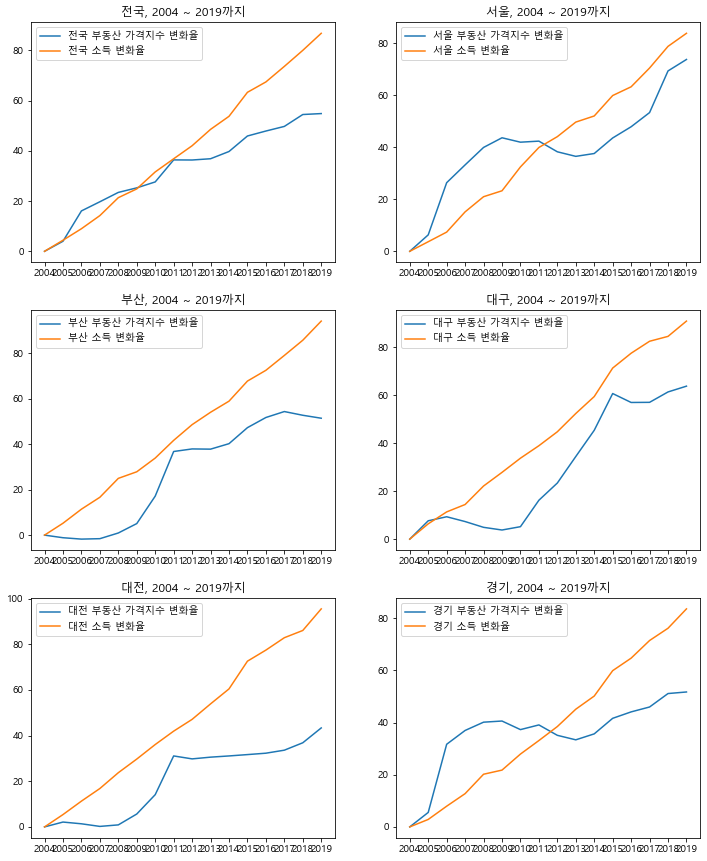

In [72]:
num_row=int((len(location_list)-1)/2)+1
plt.figure(figsize=(12,num_row*5))
for j, location in enumerate(location_list):
    year_data=[]
    for i in range(int(start_year), int(end_year)+1):
        if location == '제주':
            year_data.append(price_data[location]['서귀포'][str(i)+'.12.01'])
        else:
            year_data.append(price_data[location][location][str(i)+'.12.01'])
        
    temp_df=pd.DataFrame(income_data[location][start_year:])
    temp_df.columns=[location+'소득']
    temp_df[location+'부동산 가격지수']=year_data
    temp_df['소득변화율']=(temp_df[location+'소득']/temp_df[location+'소득'][0]-1)*100
    temp_df['부동산 가격지수 변화율']=(temp_df[location+'부동산 가격지수']/temp_df[location+'부동산 가격지수'][0]-1)*100
    
    plt.subplot(num_row, 2, j+1)
    plt.title(location+', '+start_year+' ~ ' +end_year+'까지')
    plt.plot(temp_df['부동산 가격지수 변화율'], label=location+' 부동산 가격지수 변화율')
    plt.plot(temp_df['소득변화율'], label=location+' 소득 변화율')
    plt.legend()

PIR 데이터 읽어오기

In [120]:
path=r'./data/부동산가격지수.xlsx'
wb=xw.Book(path)
sheet=wb.sheets['11.PIR(월별)']
row_num=sheet.range('J2').end('down').end('down').end('down').row
data_range='B2:N'+str(row_num)
pir_rawdata=sheet[data_range].options(pd.DataFrame, index=False, header=True).value
pir_rawdata[607:678]

del_num_s=sheet.range('J2').end('down').row-62
del_num_e=sheet.range('J2').end('down').end('down').row-3

pir_rawdata=pir_rawdata.drop(index=range(del_num_s,del_num_e+1), axis=0).reset_index()
pir_rawdata=pir_rawdata.drop('index', axis=1)
pir_rawdata

,NaN,NaN,NaN,전국 All cities,NaN,NaN,NaN,NaN,서울 Seoul,NaN,NaN,NaN,NaN
607,'19.1,평균\n주택가격\nMean Housing Price,1분위,7.705102,3.399738,2.280837,1.648945,0.974093,20.185577,9.019541,6.090941,4.415875,2.604932
608,None,None,2분위,13.063176,5.763892,3.866914,2.79561,1.65147,34.589002,15.455438,10.437134,7.566824,4.463682
609,None,None,3분위,18.564385,8.191202,5.495362,3.972907,2.346943,45.721515,20.42979,13.796338,10.002216,5.900323
610,None,None,4분위,27.156037,11.982114,8.038633,5.811581,3.433115,61.601476,27.525449,18.588072,13.476178,7.949619
611,None,None,5분위,49.519996,21.84981,14.658731,10.597623,6.260407,106.153868,47.432838,32.031631,23.222631,13.699068
612,2.0,평균\n주택가격\nMean Housing Price,1분위,7.680196,3.388749,2.273464,1.643615,0.970944,20.219467,9.034684,6.101167,4.423289,2.609305
613,None,None,2분위,13.035208,5.751551,3.858635,2.789625,1.647934,34.651803,15.483499,10.456084,7.580563,4.471786
614,None,None,3분위,18.537378,8.179285,5.487368,3.967128,2.343529,45.750931,20.442934,13.805214,10.008651,5.904119
615,None,None,4분위,27.149988,11.979445,8.036842,5.810286,3.43235,61.454903,27.459955,18.543844,13.444113,7.930704
616,None,None,5분위,49.580953,21.876706,14.676776,10.610668,6.268113,105.41729,47.103712,31.80937,23.061495,13.604013


,NaN,NaN,NaN,전국 All cities,NaN,NaN,NaN,NaN,서울 Seoul,NaN,NaN,NaN,NaN
0,None,None,None,가구 연소득 Household Income,None,None,None,None,가구 연소득 Household Income,None,None,None,None
1,None,None,None,1분위,2분위,3분위,4분위,5분위,1분위,2분위,3분위,4분위,5분위
2,'08.12\n,평균\n주택가격\nMean Housing Price,1분위,5.441946,2.645645,1.858094,1.386281,0.837666,16.73683,8.30789,5.856874,4.382019,2.65692
3,None,None,2분위,9.771072,4.750284,3.336228,2.489082,1.504038,25.967568,12.889878,9.087072,6.798801,4.122272
4,None,None,3분위,15.371844,7.473143,5.248552,3.915823,2.366151,33.968421,16.861371,11.886884,8.893576,5.392382
5,None,None,4분위,24.071598,11.702598,8.218991,6.131997,3.705283,43.541198,21.613142,15.236775,11.39991,6.912031
6,None,None,5분위,45.718515,22.226418,15.6101,11.646332,7.037341,72.680419,36.077376,25.433732,19.02911,11.537793
7,'09.1,평균\n주택가격\nMean Housing Price,1분위,5.811337,2.689902,1.859599,1.356442,0.784963,18.302216,8.569223,5.904596,4.307804,2.481497
8,None,None,2분위,10.317049,4.775467,3.301404,2.408135,1.39357,28.298048,13.24934,9.129416,6.660529,3.836777
9,None,None,3분위,16.1499,7.475327,5.167887,3.769598,2.18144,36.696595,17.181597,11.838926,8.637301,4.975489


In [121]:
big_col=list(pir_rawdata.columns)
big_col[0]='index1'
big_col[1]='index2'
big_col[2]='index3'

big_col

['index1',
 'index2',
 'index3',
 '전국 All cities',
 None,
 None,
 None,
 None,
 '서울 Seoul',
 None,
 None,
 None,
 None]

In [123]:
for num, col in enumerate(big_col):
    if col == None:
        big_col[num]=big_col[num-1]
    else:
        pass
    
big_col

['index1',
 'index2',
 'index3',
 '전국 All cities',
 '전국 All cities',
 '전국 All cities',
 '전국 All cities',
 '전국 All cities',
 '서울 Seoul',
 '서울 Seoul',
 '서울 Seoul',
 '서울 Seoul',
 '서울 Seoul']

In [125]:
small_col=list(pir_rawdata.loc[1])
small_col
small_col[0]='index1'
small_col[1]='index2'
small_col[2]='index3'
small_col

[None,
 None,
 None,
 '1분위',
 '2분위',
 '3분위',
 '4분위',
 '5분위',
 '1분위',
 '2분위',
 '3분위',
 '4분위',
 '5분위']

['index1',
 'index2',
 'index3',
 '1분위',
 '2분위',
 '3분위',
 '4분위',
 '5분위',
 '1분위',
 '2분위',
 '3분위',
 '4분위',
 '5분위']

In [126]:
pir_rawdata.columns=[big_col, small_col]
pir_rawdata
pir_rawdata.drop([0,1], inplace=True)
pir_rawdata

index1                        index2 index3            전국 All cities  \
       index1                        index2 index3                      1분위   
0        None                          None   None  가구 연소득 Household Income   
1        None                          None   None                      1분위   
2    '08.12\n  평균\n주택가격\nMean Housing Price    1분위                 5.441946   
3        None                          None    2분위                 9.771072   
4        None                          None    3분위                15.371844   
5        None                          None    4분위                24.071598   
6        None                          None    5분위                45.718515   
7       '09.1  평균\n주택가격\nMean Housing Price    1분위                 5.811337   
8        None                          None    2분위                10.317049   
9        None                          None    3분위                  16.1499   
10       None                          None    4분위                25.334442   
11       None                          None    5분위                48.164202   
12        2.0  평균\n주택가격\nMean Housing Price    1분위                  5.75459   
13       None                          None    2분위                10.219767   
14       None                          None    3분위                16.019821   
..        ...                           ...    ...                      ...   
756       7.0  평균\n주택가격\nMean Housing Price    1분위                 5.559009   
757      None                          None    2분위                10.705364   
758      None                          None    3분위                17.855716   
759      None                          None    4분위                28.198407   
760      None                          None    5분위                49.772949   
761       8.0  평균\n주택가격\nMean Housing Price    1분위                  5.69831   
762      None                          None    2분위                 11.07237   
763      None                          None    3분위                18.427124   
764      None                          None    4분위                28.862721   
765      None                          None    5분위                50.381951   
766       9.0  평균\n주택가격\nMean Housing Price    1분위                 5.796228   
767      None                          None    2분위                11.293948   
768      None                          None    3분위                18.842098   
769      None                          None    4분위                29.461049   
770      None                          None    5분위                  51.1864   

                                                               서울 Seoul  \
           2분위        3분위        4분위       5분위                      1분위   
0         None       None       None      None  가구 연소득 Household Income   
1          2분위        3분위        4분위       5분위                      1분위   
2     2.645645   1.858094   1.386281  0.837666                 16.73683   
3     4.750284   3.336228   2.489082  1.504038                25.967568   
4     7.473143   5.248552   3.915823  2.366151                33.968421   
5    11.702598   8.218991   6.131997  3.705283                43.541198   
6    22.226418    15.6101  11.646332  7.037341                72.680419   
7     2.689902   1.859599   1.356442  0.784963                18.302216   
8     4.775467   3.301404   2.408135   1.39357                28.298048   
9     7.475327   5.167887   3.769598   2.18144                36.696595   
10    11.72659   8.106894   5.913391  3.422037                47.146822   
11   22.293833  15.412302  11.242156  6.505756                 79.14305   
12    2.663635    1.84144   1.343197  0.777298                17.981139   
13    4.730438   3.270274   2.385428   1.38043                28.176016   
14    7.415118   5.126262   3.739236   2.16387                 36.72688   
..         ...        ...        ...       ...                      ...   
756   2.822745   2.036486   1.535921  0.941797   

index1                        index2 index3 전국 All cities             \
       index1                        index2 index3           1분위        2분위   
2    '08.12\n  평균\n주택가격\nMean Housing Price    1분위      5.441946   2.645645   
3        None                          None    2분위      9.771072   4.750284   
4        None                          None    3분위     15.371844   7.473143   
5        None                          None    4분위     24.071598  11.702598   
6        None                          None    5분위     45.718515  22.226418   
7       '09.1  평균\n주택가격\nMean Housing Price    1분위      5.811337   2.689902   
8        None                          None    2분위     10.317049   4.775467   
9        None                          None    3분위       16.1499   7.475327   
10       None                          None    4분위     25.334442   11.72659   
11       None                          None    5분위     48.164202  22.293833   
12        2.0  평균\n주택가격\nMean Housing Price    1분위       5.75459   2.663635   
13       None                          None    2분위     10.219767   4.730438   
14       None                          None    3분위     16.019821   7.415118   
15       None                          None    4분위     25.302676  11.711886   
16       None                          None    5분위     48.039562  22.236141   
..        ...                           ...    ...           ...        ...   
756       7.0  평균\n주택가격\nMean Housing Price    1분위      5.559009   2.822745   
757      None                          None    2분위     10.705364   5.435953   
758      None                          None    3분위     17.855716   9.066748   
759      None                          None    4분위     28.198407  14.318544   
760      None                          None    5분위     49.772949  25.273631   
761       8.0  평균\n주택가격\nMean Housing Price    1분위       5.69831   2.893479   
762      None                          None    2분위      11.07237   5.622311   
763      None                          None    3분위     18.427124   9.356896   
764      None                          None    4분위     28.862721  14.655868   
765      None                          None    5분위     50.381951  25.582869   
766       9.0  평균\n주택가격\nMean Housing Price    1분위      5.796228     2.9432   
767      None                          None    2분위     11.293948   5.734824   
768      None                          None    3분위     18.842098   9.567611   
769      None                          None    4분위     29.461049  14.959686   
770      None                          None    5분위       51.1864  25.991351   

                                       서울 Seoul                        \
           3분위        4분위       5분위         1분위        2분위        3분위   
2     1.858094   1.386281  0.837666    16.73683    8.30789   5.856874   
3     3.336228   2.489082  1.504038   25.967568  12.889878   9.087072   
4     5.248552   3.915823  2.366151   33.968421  16.861371  11.886884   
5     8.218991   6.131997  3.705283   43.541198  21.613142  15.236775   
6      15.6101  11.646332  7.037341   72.680419  36.077376  25.433732   
7     1.859599   1.356442  0.784963   18.302216   8.569223   5.904596   
8     3.301404   2.408135   1.39357   28.298048   13.24934   9.129416   
9     5.167887   3.769598   2.18144   36.696595  17.181597  11.838926   
10    8.106894   5.913391  3.422037   47.146822  22.074465  15.210341   
11   15.412302  11.242156  6.505756    79.14305  37.055319  25.532851   
12     1.84144   1.343197  0.777298   17.981139   8.418893   5.801011   
13    3.270274   2.385428   1.38043   28.176016  13.192204   9.090047   
14    5.126262   3.739236   2.16387    36.72688  17.195777  11.848696   
15    8.096729   5.905977  3.417747   47.476097  22.228635  15.316571   
16   15.372418  11.213064   6.48892   79.279067  37.119003  25.576733   
..         ...        ...       ...         ...        ...        ...   
756   2.036486   1.535921  0.941797   19.702584  10.051906   7.243468   
757     3.92

In [134]:
big_index=list(pir_rawdata['index1']['index1'])
big_index
new_index=[]
for num, index in enumerate(big_index):
    if(index != None):
        if type(index) == str:
            big_index[num]='20'+index.split('.')[0][1:]+'.'+index.split('.')[1][:2]
        else:
            big_index[num]=big_index[num-1].split('.')[0]+'.'+str(int(index))
    else:
        big_index[num]=big_index[num-1]

big_index

["'08.12\n",
 None,
 None,
 None,
 None,
 "'09.1",
 None,
 None,
 None,
 None,
 2.0,
 None,
 None,
 None,
 None,
 3.0,
 None,
 None,
 None,
 None,
 4.0,
 None,
 None,
 None,
 None,
 5.0,
 None,
 None,
 None,
 None,
 6.0,
 None,
 None,
 None,
 None,
 7.0,
 None,
 None,
 None,
 None,
 8.0,
 None,
 None,
 None,
 None,
 9.0,
 None,
 None,
 None,
 None,
 10.0,
 None,
 None,
 None,
 None,
 11.0,
 None,
 None,
 None,
 None,
 12.0,
 None,
 None,
 None,
 None,
 "'10.1",
 None,
 None,
 None,
 None,
 2.0,
 None,
 None,
 None,
 None,
 3.0,
 None,
 None,
 None,
 None,
 4.0,
 None,
 None,
 None,
 None,
 5.0,
 None,
 None,
 None,
 None,
 6.0,
 None,
 None,
 None,
 None,
 7.0,
 None,
 None,
 None,
 None,
 8.0,
 None,
 None,
 None,
 None,
 9.0,
 None,
 None,
 None,
 None,
 10.0,
 None,
 None,
 None,
 None,
 11.0,
 None,
 None,
 None,
 None,
 12.0,
 None,
 None,
 None,
 None,
 "'11.1",
 None,
 None,
 None,
 None,
 2.0,
 None,
 None,
 None,
 None,
 3.0,
 None,
 None,
 None,
 None,
 4.0,
 None,
 None,
 No

['2008.12',
 '2008.12',
 '2008.12',
 '2008.12',
 '2008.12',
 '2009.1',
 '2009.1',
 '2009.1',
 '2009.1',
 '2009.1',
 '2009.2',
 '2009.2',
 '2009.2',
 '2009.2',
 '2009.2',
 '2009.3',
 '2009.3',
 '2009.3',
 '2009.3',
 '2009.3',
 '2009.4',
 '2009.4',
 '2009.4',
 '2009.4',
 '2009.4',
 '2009.5',
 '2009.5',
 '2009.5',
 '2009.5',
 '2009.5',
 '2009.6',
 '2009.6',
 '2009.6',
 '2009.6',
 '2009.6',
 '2009.7',
 '2009.7',
 '2009.7',
 '2009.7',
 '2009.7',
 '2009.8',
 '2009.8',
 '2009.8',
 '2009.8',
 '2009.8',
 '2009.9',
 '2009.9',
 '2009.9',
 '2009.9',
 '2009.9',
 '2009.10',
 '2009.10',
 '2009.10',
 '2009.10',
 '2009.10',
 '2009.11',
 '2009.11',
 '2009.11',
 '2009.11',
 '2009.11',
 '2009.12',
 '2009.12',
 '2009.12',
 '2009.12',
 '2009.12',
 '2010.1',
 '2010.1',
 '2010.1',
 '2010.1',
 '2010.1',
 '2010.2',
 '2010.2',
 '2010.2',
 '2010.2',
 '2010.2',
 '2010.3',
 '2010.3',
 '2010.3',
 '2010.3',
 '2010.3',
 '2010.4',
 '2010.4',
 '2010.4',
 '2010.4',
 '2010.4',
 '2010.5',
 '2010.5',
 '2010.5',
 '2010.5',
 

In [ ]:
small_index=list(pir_rawdata['index3']['index3'])
pir_rawdata.index=[pd.to_datetime(big_index), small_index]

pir_rawdata

del pir_rawdata['index1']
del pir_rawdata['index2']
del pir_rawdata['index3']

In [137]:
pir_rawdata

pir_rawdata.index.names=['날짜', '평균주택가격']
pir_rawdata

전국 All cities                                             \
                         1분위        2분위        3분위        4분위       5분위   
2008-12-01 1분위      5.441946   2.645645   1.858094   1.386281  0.837666   
           2분위      9.771072   4.750284   3.336228   2.489082  1.504038   
           3분위     15.371844   7.473143   5.248552   3.915823  2.366151   
           4분위     24.071598  11.702598   8.218991   6.131997  3.705283   
           5분위     45.718515  22.226418    15.6101  11.646332  7.037341   
2009-01-01 1분위      5.811337   2.689902   1.859599   1.356442  0.784963   
           2분위     10.317049   4.775467   3.301404   2.408135   1.39357   
           3분위       16.1499   7.475327   5.167887   3.769598   2.18144   
           4분위     25.334442   11.72659   8.106894   5.913391  3.422037   
           5분위     48.164202  22.293833  15.412302  11.242156  6.505756   
2009-02-01 1분위       5.75459   2.663635    1.84144   1.343197  0.777298   
           2분위     10.219767   4.730438   3.270274   2.385428   1.38043   
           3분위     16.019821   7.415118   5.126262   3.739236   2.16387   
           4분위     25.302676  11.711886   8.096729   5.905977  3.417747   
           5분위     48.039562  22.236141  15.372418  11.213064   6.48892   
...                      ...        ...        ...        ...       ...   
2021-07-01 1분위      5.559009   2.822745   2.036486   1.535921  0.941797   
           2분위     10.705364   5.435953     3.9218   2.957827  1.813683   
           3분위     17.855716   9.066748   6.541258   4.933426  3.025082   
           4분위     28.198407  14.318544  10.330196   7.791049  4.777321   
           5분위     49.772949  25.273631  18.233807  13.751965   8.43244   
2021-08-01 1분위       5.69831   2.893479   2.087517   1.574409  0.965397   
           2분위      11.07237   5.622311   4.056249   3.059229   1.87586   
           3분위     18.427124   9.356896   6.750587   5.091303  3.121889   
           4분위     28.862721  14.655868  10.573561   7.974595  4.889868   
           5분위     50.381951  25.582869  18.456909  13.920228  8.535616   
2021-09-01 1분위      5.796228     2.9432   2.123389   1.601463  0.981986   
           2분위     11.293948   5.734824   4.137422    3.12045    1.9134   
           3분위     18.842098   9.567611   6.902609   5.205958  3.192193   
           4분위     29.461049  14.959686  10.792752    8.13991  4.991236   
           5분위       51.1864  25.991351  18.751611  14.142493  8.671904   

                  서울 Seoul                                              
                       1분위        2분위        3분위        4분위        5분위  
2008-12-01 1분위    16.73683    8.30789   5.856874   4.382019    2.65692  
           2분위   25.967568  12.889878   9.087072   6.798801   4.122272  
           3분위   33.968421  16.861371  11.886884   8.893576   5.392382  
           4분위   43.541198  21.613142  15.236775   11.39991   6.912031  
           5분위   72.680419  36.077376  25.433732   19.02911  11.537793  
2009-01-01 1분위   18.302216   8.569223   5.904596   4.307804   2.481497  
           2분위   28.298048   13.24934   9.129416   6.660529   3.836777  
           3분위   36.696595  17.181597  11.838926   8.637301   4.975489  
           4분위   47.146822  22.074465  15.210341  11.096977   6.392378  
           5분위    79.14305  37.055319  25.532851  18.627949  10.730571  
2009-02-01 1분위   17.981139   8.418893   5.801011   4.232232   2.437964  
           2분위   28.176016  13.192204   9.090047   6.631807   3.820231  
           3분위    36.72688  17.195777  11.848696   8.644429   4.979596  
           4분위   47.476097  22.228635  15.316571  11.174479   6.437023  
           5분위   79.279067  37.119003  25.576733  18.659964  10.749013  
...                    ...        ...        ...        ...        ...  
2021-07-01 1분위   19.702584  10.051906   7.243468   5.432407   3.347328  
           2분위   36.375425  18.558092   13.37308  10.029451   6.179924  
           3분위   46.642779  23.796312  17.147775  12.860371   7.924274  
      

전국 All cities                                             \
                            1분위        2분위        3분위        4분위       5분위   
날짜         평균주택가격                                                            
2008-12-01 1분위         5.441946   2.645645   1.858094   1.386281  0.837666   
           2분위         9.771072   4.750284   3.336228   2.489082  1.504038   
           3분위        15.371844   7.473143   5.248552   3.915823  2.366151   
           4분위        24.071598  11.702598   8.218991   6.131997  3.705283   
           5분위        45.718515  22.226418    15.6101  11.646332  7.037341   
2009-01-01 1분위         5.811337   2.689902   1.859599   1.356442  0.784963   
           2분위        10.317049   4.775467   3.301404   2.408135   1.39357   
           3분위          16.1499   7.475327   5.167887   3.769598   2.18144   
           4분위        25.334442   11.72659   8.106894   5.913391  3.422037   
           5분위        48.164202  22.293833  15.412302  11.242156  6.505756   
2009-02-01 1분위          5.75459   2.663635    1.84144   1.343197  0.777298   
           2분위        10.219767   4.730438   3.270274   2.385428   1.38043   
           3분위        16.019821   7.415118   5.126262   3.739236   2.16387   
           4분위        25.302676  11.711886   8.096729   5.905977  3.417747   
           5분위        48.039562  22.236141  15.372418  11.213064   6.48892   
...                         ...        ...        ...        ...       ...   
2021-07-01 1분위         5.559009   2.822745   2.036486   1.535921  0.941797   
           2분위        10.705364   5.435953     3.9218   2.957827  1.813683   
           3분위        17.855716   9.066748   6.541258   4.933426  3.025082   
           4분위        28.198407  14.318544  10.330196   7.791049  4.777321   
           5분위        49.772949  25.273631  18.233807  13.751965   8.43244   
2021-08-01 1분위          5.69831   2.893479   2.087517   1.574409  0.965397   
           2분위         11.07237   5.622311   4.056249   3.059229   1.87586   
           3분위        18.427124   9.356896   6.750587   5.091303  3.121889   
           4분위        28.862721  14.655868  10.573561   7.974595  4.889868   
           5분위        50.381951  25.582869  18.456909  13.920228  8.535616   
2021-09-01 1분위         5.796228     2.9432   2.123389   1.601463  0.981986   
           2분위        11.293948   5.734824   4.137422    3.12045    1.9134   
           3분위        18.842098   9.567611   6.902609   5.205958  3.192193   
           4분위        29.461049  14.959686  10.792752    8.13991  4.991236   
           5분위          51.1864  25.991351  18.751611  14.142493  8.671904   

                     서울 Seoul                                              
                          1분위        2분위        3분위        4분위        5분위  
날짜         평균주택가격                                                          
2008-12-01 1분위       16.73683    8.30789   5.856874   4.382019    2.65692  
           2분위      25.967568  12.889878   9.087072   6.798801   4.122272  
           3분위      33.968421  16.861371  11.886884   8.893576   5.392382  
           4분위      43.541198  21.613142  15.236775   11.39991   6.912031  
           5분위      72.680419  36.077376  25.433732   19.02911  11.537793  
2009-01-01 1분위      18.302216   8.569223   5.904596   4.307804   2.481497  
           2분위      28.298048   13.24934   9.129416   6.660529   3.836777  
           3분위      36.696595  17.181597  11.838926   8.637301   4.975489  
           4분위      47.146822  22.074465  15.210341  11.096977   6.392378  
           5분위       79.14305  37.055319  25.532851  18.627949  10.730571  
2009-02-01 1분위      17.981139   8.418893   5.801011   4.232232   2.437964  
           2분위      28.176016  13.192204   9.090047   6.631807   3.820231  
           3분위       36.72688  17.195777  11.848696   8.644429   4.979596  
           4분위      47.476097  22.228635  15.316571  11.174479   6.437023  
           5분위      79.279067  37.119003  25.576733  18.659964  10.749013

In [138]:
pir_rawdata.xs('3분위', level='평균주택가격')

전국 All cities                                           서울 Seoul  \
                     1분위       2분위       3분위       4분위       5분위        1분위   
날짜                                                                            
2008-12-01     15.371844  7.473143  5.248552  3.915823  2.366151  33.968421   
2009-01-01       16.1499  7.475327  5.167887  3.769598   2.18144  36.696595   
2009-02-01     16.019821  7.415118  5.126262  3.739236   2.16387   36.72688   
2009-03-01     15.954978  7.385104  5.105513  3.724101  2.155111  36.549641   
2009-04-01     15.393399  7.256726  5.141413  3.863399  2.414333   35.80001   
2009-05-01       15.3845   7.25253  5.138441  3.861166  2.412937  35.872251   
2009-06-01     15.435142  7.276404  5.155356  3.873876   2.42088  35.863498   
2009-07-01     15.133884  7.137105  5.026165  3.739756  2.297369  35.562752   
2009-08-01     15.221437  7.178395  5.055242  3.761391   2.31066   35.74565   
2009-09-01     15.391165  7.258438  5.111611  3.803333  2.336425  36.360968   
2009-10-01     14.661497  7.073196  4.994805  3.775171  2.291936   34.48519   
2009-11-01      14.71302  7.098053  5.012357  3.788437  2.299991  34.290129   
2009-12-01     14.744645   7.11331  5.023131  3.796581  2.304934  34.194258   
2010-01-01     14.837121  7.074475  4.972478     3.648  2.089035  34.448314   
2010-02-01     14.841919  7.076763  4.974086   3.64918   2.08971  34.706043   
...                  ...       ...       ...       ...       ...        ...   
2020-07-01     15.395781  7.463985  5.327134  3.949411  2.423707  41.654161   
2020-08-01     15.549094  7.538313  5.380183   3.98874  2.447842  42.631357   
2020-09-01     15.784456  7.652418  5.461621  4.049116  2.484895  43.893724   
2020-10-01     16.042918  8.036001  5.686496  4.223377  2.624865  45.072549   
2020-11-01     16.466939  8.248396  5.836793  4.335002  2.694241  45.898577   
2020-12-01     17.030462  8.530669  6.036536  4.483352  2.786442   46.89079   
2021-01-01     17.918902   8.85951  6.195296  4.471104  2.664785  48.493082   
2021-02-01      18.42712  9.110785  6.371008  4.597914  2.740364  49.565775   
2021-03-01     19.041818  9.414705  6.583534  4.751293  2.831778  50.699672   
2021-04-01      18.82582  9.405885  6.749771  5.116593  3.012244  49.481079   
2021-05-01      19.17219  9.578941  6.873958  5.210731  3.067665  49.892537   
2021-06-01     19.715228  9.850257  7.068657  5.358321  3.154554   50.36799   
2021-07-01     17.855716  9.066748  6.541258  4.933426  3.025082  46.642779   
2021-08-01     18.427124  9.356896  6.750587  5.091303  3.121889  47.444292   
2021-09-01     18.842098  9.567611  6.902609  5.205958  3.192193  47.958526   

                                                       
                  2분위        3분위        4분위       5분위  
날짜                                                     
2008-12-01  16.861371  11.886884   8.893576  5.392382  
2009-01-01  17.181597  11.838926   8.637301  4.975489  
2009-02-01  17.195777  11.848696   8.644429  4.979596  
2009-03-01  17.112793  11.791516   8.602712  4.955565  
2009-04-01  16.966925   11.99662   9.019494  5.624337  
2009-05-01  17.001162  12.020828   9.037695  5.635686  
2009-06-01  16.997014  12.017895    9.03549  5.634311  
2009-07-01  16.807829  11.853258    8.80407  5.376909  
2009-08-01  16.894271  11.914219   8.849349  5.404562  
2009-09-01  17.185085  12.119307    9.00168  5.497595  
2009-10-01  16.749175  11.822309   8.923021  5.409098  
2009-11-01  16.654435  11.755438   8.872549  5.378503  
2009-12-01  16.607871  11.722571   8.847743  5.363465  
2010-01-01   16.51745  11.605926   8.473485  4.807957  
2010-02-01  16.641027  11.692757    8.53688  4.843929  
...               ...        ...        ...       ...  
2020-07-01  20.570197  14.795167  10.944323  6.727499  
2020-08-01  21.052768  15.142257  11.201074  6.885324  
2020-09-01  21.676167  15.590638  11.532751  7.089207  
2020-10-01  22.581755  16.148076  11.941135  7.447623  
2020-11-01  22.995602  16.444015  12

<Figure size 720x1080 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '1분위 가구의 중간값(3분위) 주택가격 PIR')

<AxesSubplot:>

Text(0.5, 1.0, '2분위 가구의 중간값(3분위) 주택가격 PIR')

<AxesSubplot:>

Text(0.5, 1.0, '3분위 가구의 중간값(3분위) 주택가격 PIR')

<AxesSubplot:>

Text(0.5, 1.0, '4분위 가구의 중간값(3분위) 주택가격 PIR')

<AxesSubplot:>

Text(0.5, 1.0, '5분위 가구의 중간값(3분위) 주택가격 PIR')

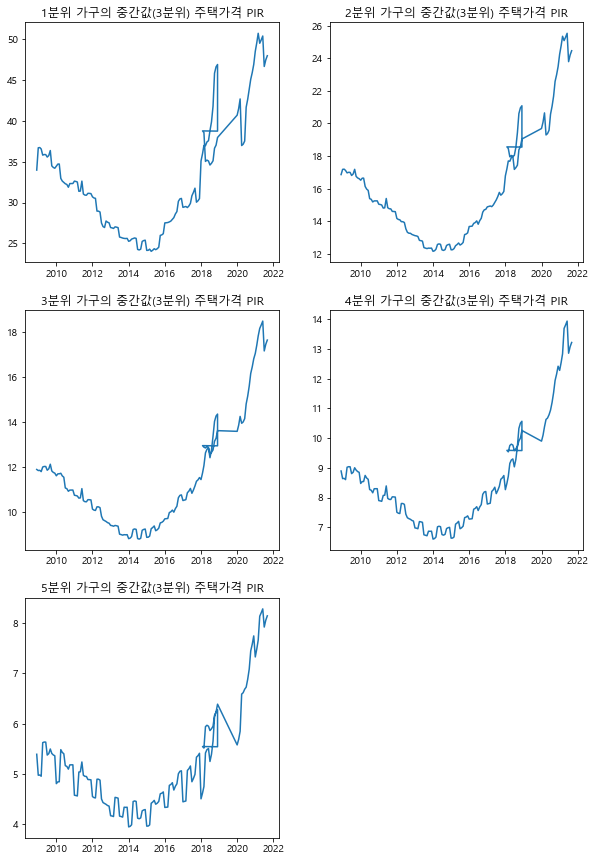

In [139]:
gagus=['1분위', '2분위', '3분위', '4분위', '5분위']
location='서울 Seoul'
num_row=int((len(gagus)-1)/2)+1

plt.figure(figsize=(10, num_row*5))

for i, gagu in enumerate(gagus):
    plt.subplot(num_row, 2, i+1)
    plt.title(gagu+' 가구의 중간값(3분위) 주택가격 PIR')
    plt.plot(pir_rawdata.xs('3분위', level='평균주택가격')[location][gagu])
    
plt.show()

<Figure size 720x1080 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '1분위 가구의 중간값(3분위) 주택가격 PIR')

<AxesSubplot:>

Text(0.5, 1.0, '2분위 가구의 중간값(3분위) 주택가격 PIR')

<AxesSubplot:>

Text(0.5, 1.0, '3분위 가구의 중간값(3분위) 주택가격 PIR')

<AxesSubplot:>

Text(0.5, 1.0, '4분위 가구의 중간값(3분위) 주택가격 PIR')

<AxesSubplot:>

Text(0.5, 1.0, '5분위 가구의 중간값(3분위) 주택가격 PIR')

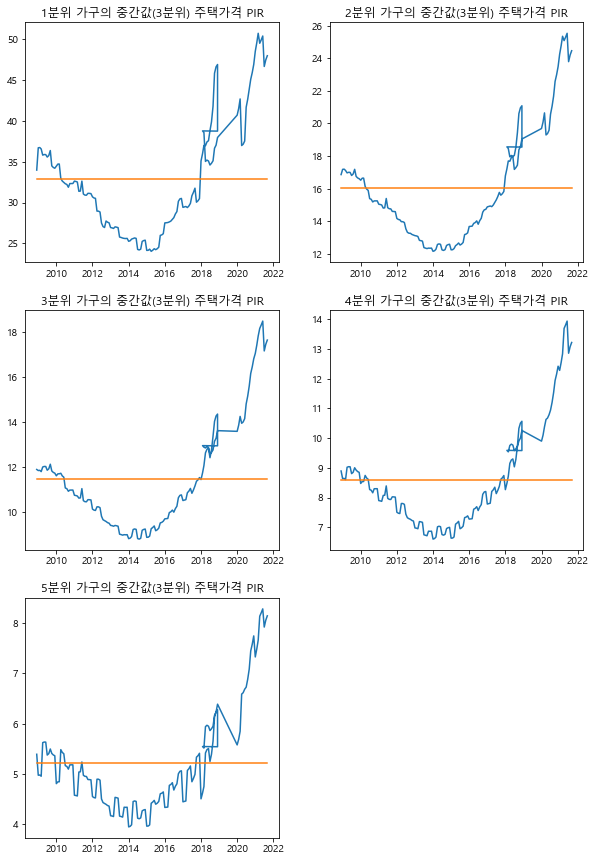

In [173]:
gagus=['1분위', '2분위', '3분위', '4분위', '5분위']
location='서울 Seoul'
house_price_level='3분위'
num_row=int((len(gagus)-1)/2)+1

plt.figure(figsize=(10, num_row*5))

for i, gagu in enumerate(gagus):
    plt.subplot(num_row, 2, i+1)
    plt.title(gagu+' 가구의 중간값('+house_price_level+') 주택가격 PIR')
    plt.plot(pir_rawdata.xs('3분위', level='평균주택가격')[location][gagu])
    indx=pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu].index
    
    long_mean=pir_rawdata.xs(house_price_level,
                            level='평균주택가격')[location][gagu].mean()
    plt.plot(indx, [long_mean for a in range(len(pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu]))])
    
plt.show()